In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit
import scipy as sp
sns.set_theme(style="darkgrid")
sns.set_context("paper")

(1.647+/-0.025)e+11


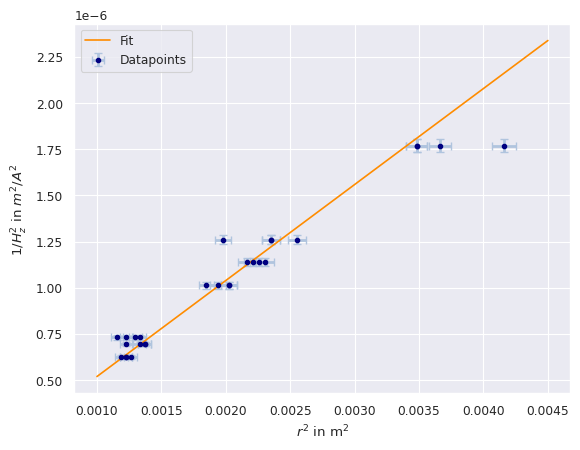

In [63]:
df=pd.read_csv("eRadius_U2494.csv")
d=np.ones(len(df["Durchmesser in  cm"])) * ufloat(1, 1)
I=np.ones(len(df["Stromstaerke in A"])) * ufloat(1, 1)
for i in range(len(d)):
    d[i] = ufloat(df["Durchmesser in  cm"][i], 0.14)
    I[i] = ufloat(df["Stromstaerke in A"][i], 0.001)
r=d/2 * 10**(-2)# in m
r2=r**2
U=ufloat(249.9, 0.1)
r_spule=ufloat(15, 0.14) * 10**(-2) #in m
N=130
H=8*N*I/(np.sqrt(125)*r_spule)
H2=1/(H**2)
mu0=1.256e-6

def Function1(r2, em):
    return em*mu0**2*r2/(2*U.n)

popt, pcov = curve_fit(Function1, [r2[i].n for i in range(len(r2))], [H2[i].n for i in range(len(r2))],
                       sigma=[H2[i].s for i in range(len(r2))], p0 = 10**10)
em1=ufloat(popt[0], np.sqrt(pcov))
print(em1)

plt.errorbar([r2[i].n for i in range(len(r))], [H2[i].n for i in range(len(H))],
             xerr=[r2[i].s for i in range(len(r))], yerr=[H2[i].s for i in range(len(H))],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
x_values=np.linspace(0.001, 0.0045, 100)
plt.plot(x_values, Function1(x_values, popt[0]), color="darkorange", label="Fit")

plt.xlabel(r"$r^2$ in m$^2$")
plt.ylabel(r"1/$H_z^2$ in $m^2 / A^2$ ")
plt.legend()
plt.show()


(1.611+/-0.022)e+11


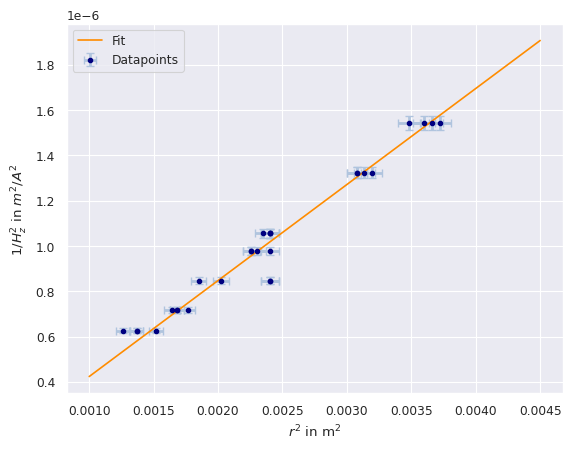

In [62]:
df=pd.read_csv("eRadius_U2998.csv")
d=np.ones(len(df["Durchmesser in cm"])) * ufloat(1, 1)
I=np.ones(len(df["Stromstaerke in A"])) * ufloat(1, 1)
for i in range(len(d)):
    d[i] = ufloat(df["Durchmesser in cm"][i], 0.14)
    I[i] = ufloat(df["Stromstaerke in A"][i], 0.001)
r=d/2 * 10**(-2)# in m
r2=r**2
U=ufloat(299.8, 0.1)
r_spule=ufloat(15, 0.14) * 10**(-2) #in m
N=130
H=8*N*I/(np.sqrt(125)*r_spule)
H2=1/(H**2)
mu0=1.256e-6

def Function1(r2, em):
    return em*mu0**2*r2/(2*U.n)

popt, pcov = curve_fit(Function1, [r2[i].n for i in range(len(r2))], [H2[i].n for i in range(len(r2))],
                       sigma=[H2[i].s for i in range(len(r2))], p0 = 10**10)
em1=ufloat(popt[0], np.sqrt(pcov))
print(em1)

plt.errorbar([r2[i].n for i in range(len(r))], [H2[i].n for i in range(len(H))],
             xerr=[r2[i].s for i in range(len(r))], yerr=[H2[i].s for i in range(len(H))],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
x_values=np.linspace(0.001, 0.0045, 100)
plt.plot(x_values, Function1(x_values, popt[0]), color="darkorange", label="Fit")

plt.xlabel(r"$r^2$ in m$^2$")
plt.ylabel(r"1/$H_z^2$ in $m^2 / A^2$ ")
plt.legend()
plt.show()


(1.647+/-0.025)e+11


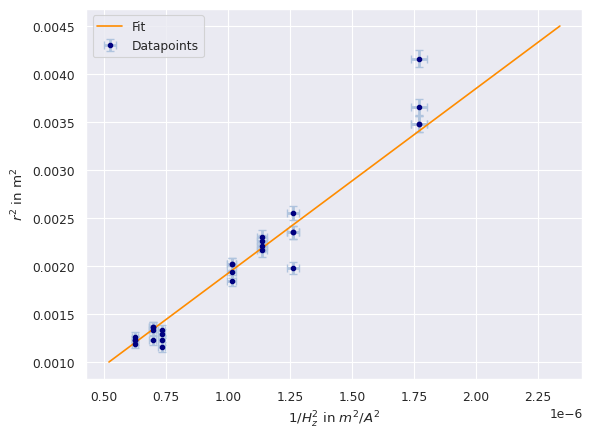

In [64]:
#plots with axes flipped (more correct dependency)
df=pd.read_csv("eRadius_U2494.csv")
d=np.ones(len(df["Durchmesser in  cm"])) * ufloat(1, 1)
I=np.ones(len(df["Stromstaerke in A"])) * ufloat(1, 1)
for i in range(len(d)):
    d[i] = ufloat(df["Durchmesser in  cm"][i], 0.14)
    I[i] = ufloat(df["Stromstaerke in A"][i], 0.001)
r=d/2 * 10**(-2)# in m
r2=r**2
U=ufloat(249.9, 0.1)
r_spule=ufloat(15, 0.14) * 10**(-2) #in m
N=130
H=8*N*I/(np.sqrt(125)*r_spule)
H2=1/(H**2)
mu0=1.256e-6

def Function1(r2, em):
    return em*mu0**2*r2/(2*U.n)

popt, pcov = curve_fit(Function1, [r2[i].n for i in range(len(r2))], [H2[i].n for i in range(len(r2))],
                       sigma=[H2[i].s for i in range(len(r2))], p0 = 10**10)
em1=ufloat(popt[0], np.sqrt(pcov))
print(em1)

plt.errorbar([H2[i].n for i in range(len(H))], [r2[i].n for i in range(len(r))],
             yerr=[r2[i].s for i in range(len(r))], xerr=[H2[i].s for i in range(len(H))],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
x_values=np.linspace(0.001, 0.0045, 100)
plt.plot(Function1(x_values, popt[0]), x_values, color="darkorange", label="Fit")

plt.ylabel(r"$r^2$ in m$^2$")
plt.xlabel(r"1/$H_z^2$ in $m^2 / A^2$ ")
plt.legend()
plt.show()

(1.611+/-0.022)e+11


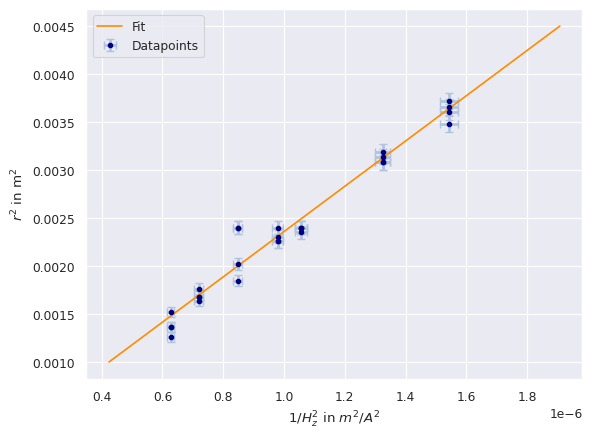

In [65]:
#plots with axes flipped (more correct dependency)
df=pd.read_csv("eRadius_U2998.csv")
d=np.ones(len(df["Durchmesser in cm"])) * ufloat(1, 1)
I=np.ones(len(df["Stromstaerke in A"])) * ufloat(1, 1)
for i in range(len(d)):
    d[i] = ufloat(df["Durchmesser in cm"][i], 0.14)
    I[i] = ufloat(df["Stromstaerke in A"][i], 0.001)
r=d/2 * 10**(-2)# in m
r2=r**2
U=ufloat(299.8, 0.1)
r_spule=ufloat(15, 0.14) * 10**(-2) #in m
N=130
H=8*N*I/(np.sqrt(125)*r_spule)
H2=1/(H**2)
mu0=1.256e-6

def Function1(r2, em):
    return em*mu0**2*r2/(2*U.n)

popt, pcov = curve_fit(Function1, [r2[i].n for i in range(len(r2))], [H2[i].n for i in range(len(r2))],
                       sigma=[H2[i].s for i in range(len(r2))], p0 = 10**10)
em1=ufloat(popt[0], np.sqrt(pcov))
print(em1)

plt.errorbar([H2[i].n for i in range(len(H))], [r2[i].n for i in range(len(r))],
             yerr=[r2[i].s for i in range(len(r))], xerr=[H2[i].s for i in range(len(H))],
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")
x_values=np.linspace(0.001, 0.0045, 100)
plt.plot(Function1(x_values, popt[0]), x_values, color="darkorange", label="Fit")

plt.ylabel(r"$r^2$ in m$^2$")
plt.xlabel(r"1/$H_z^2$ in $m^2 / A^2$ ")
plt.legend()
plt.show()